# UFABC - ESTI019 - Codificação de Sinais Multimídia
<h2> Laboratório 6 - Seção de PDS da Voz </h2>
<h3> Prof. Mário Minami </h2>
<h2> OBJETIVOS: </h2>
<ol>
<li> Analisar arquivos de Áudio com dígitos, números gerais, texto lido e poesia </li>
<li> Leitura de Arquivos de Áudio e janelamento</li>
<li> Cálculo das Energias de Tempo Curto</li>
<li> Cálculo dos Espectrogramas</li>
<li> Determinação do Pitch, da Frequência Fundamental e das Formantes ($f_1$ a $f_4$) de Algumas Vogais</li>
<li>Determinação de fonemas surdos, sonoros, consoantes gerais e plosivos</li>
</ol>

<h2> 1. Subir os arquivos de Áudio com dígitos, números gerais, texto lido e poesia </h2>

Suba os arquivos com:
<ul>
<li> Dígitos (pronunciados separadamente) </li>
<li> Números Gerais (p.ex. dia/mês/ano de nascimento, nº celular, RA)</li>
<li> Texto lido </li>
<li> Poesia declamada </li>
</ul>


<h2> 2. Leitura de Arquivos de Áudio e janelamento </h2>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import librosa
import librosa.display
import IPython.display
#OBS.: insira nome do arquivo WAV
audio1 = '/content/drive/MyDrive/UFABC/Codificacaosinais/Entre_Leva_Catia_Falada.wav'
audioB1 = '/content/drive/MyDrive/UFABC/Codificacaosinais/BrendolAlexandreAssisFreire.wav'
audioB2 = '/content/drive/MyDrive/UFABC/Codificacaosinais/BrendolAlexandreAssisFreire2.wav'
audioJ1 = '/content/drive/MyDrive/UFABC/Codificacaosinais/JonnathasHLC.wav'
audioJ2 = '/content/drive/MyDrive/UFABC/Codificacaosinais/JonnathasHLC_2.wav'
audioRAB1 = '/content/drive/MyDrive/UFABC/Codificacaosinais/RA11201722077.wav'
audioRAB2 = '/content/drive/MyDrive/UFABC/Codificacaosinais/RA11201722077_2.wav'
audioRAJ1 = '/content/drive/MyDrive/UFABC/Codificacaosinais/RA11123915.wav'
audioRAJ2 = '/content/drive/MyDrive/UFABC/Codificacaosinais/RA11123915_2.wav'
audioFraseB1 = '/content/drive/MyDrive/UFABC/Codificacaosinais/Frase1_Brendol.wav'
audioFraseB2 = '/content/drive/MyDrive/UFABC/Codificacaosinais/Frase1_Brendol_2.wav'
audioFraseJ1 = '/content/drive/MyDrive/UFABC/Codificacaosinais/Frase1_Jonnathas.wav'
audioFraseJ2 = '/content/drive/MyDrive/UFABC/Codificacaosinais/Frase1_Jonnathas_2.wav'
audioTrechoB1 = '/content/drive/MyDrive/UFABC/Codificacaosinais/Trecho1_Brendol.wav'
audioTrechoB2 = '/content/drive/MyDrive/UFABC/Codificacaosinais/Trecho1_Brendol_2.wav'
audioTrechoJ1 = '/content/drive/MyDrive/UFABC/Codificacaosinais/Trecho1_Jonnathas.wav'
audioTrechoJ2 = '/content/drive/MyDrive/UFABC/Codificacaosinais/Trecho1_Jonnathas_2.wav'
audioMusicaSoloPreto = '/content/drive/MyDrive/UFABC/Codificacaosinais/Musica1_SoloPreto.wav'
audioMusicaCoroPreto = '/content/drive/MyDrive/UFABC/Codificacaosinais/Musica1_CoroPreto.wav'
audioMusicaPrata = '/content/drive/MyDrive/UFABC/Codificacaosinais/Musica1_PrataCruzados.wav'
print(audio1)
v1 , sr1 = librosa.load(audio1)
print(type(v1), type(sr1))
print(v1.shape, sr1)
# Player será aberto! AGUARDE até abrir!
IPython.display.Audio(data=v1, rate=sr1)

/content/drive/MyDrive/UFABC/Codificacaosinais/Entre_Leva_Catia_Falada.wav
<class 'numpy.ndarray'> <class 'int'>
(292805,) 22050


Text(0.5, 1.0, 'Voz da Catia/content/drive/MyDrive/UFABC/Codificacaosinais/Entre_Leva_Catia_Falada.wav')

<Figure size 640x480 with 0 Axes>

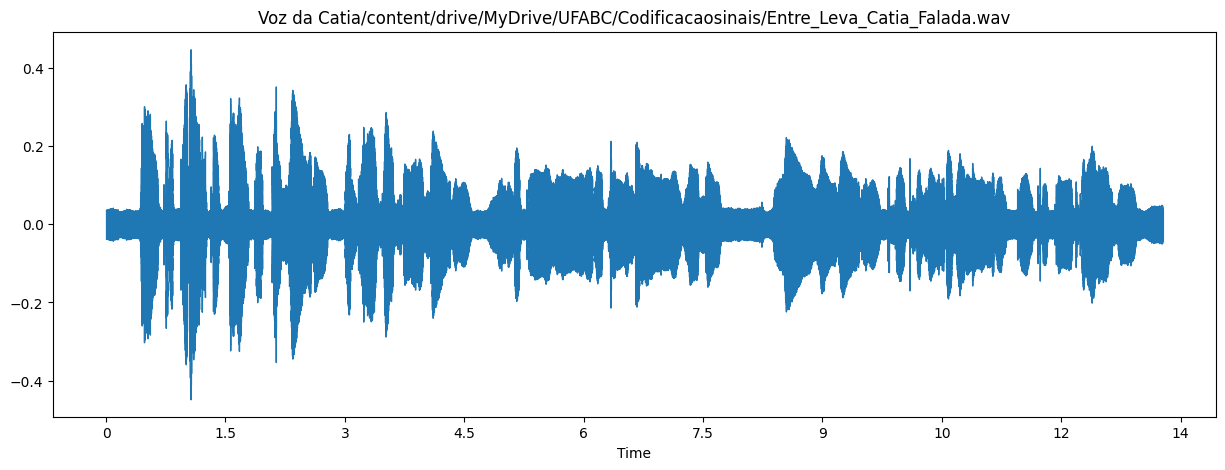

In [ ]:
plt.figure()
fig, ax = plt.subplots(figsize=(15, 5))
librosa.display.waveshow(v1, sr=sr1)
plt.title('Voz da Catia' + audio1)

### 2.1 Definição dos Parâmetros da Análise

In [ ]:
print('Frequência de Amostragem', sr1)

Frequência de Amostragem 22050


In [ ]:
fa = sr1
print(fa)

22050


In [ ]:
Ts = 0.04   # Tempo de duração do segmento em segundos
Nj = int(Ts*fa) # Número de pontos da Janela
print('Tamanho do Segmento', Nj)

Tamanho do Segmento 882


In [ ]:
Nseg = int(len(v1)/Nj)
Nover = int(Nj*0.5)
print('Número de Segmentos no Arquivo', Nseg, '. Pontos Soprepostos', Nover )

Número de Segmentos no Arquivo 331 . Pontos Soprepostos 441


<h3> 2.2 Obtendo uma Janela de Hamming </h3>

Text(0.5, 1.0, 'Janela de Hamming')

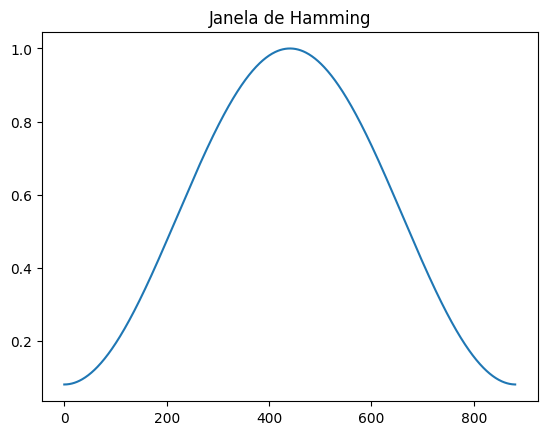

In [ ]:
from scipy import signal
hm = signal.get_window('hamming', Nj)
plt.plot(hm); plt.title('Janela de Hamming')

<h2> 3. Energia de Tempo Curto </h2>

### 3.1 Cálculo para arquivo de teste

Text(0.5, 0, 'Segmento')

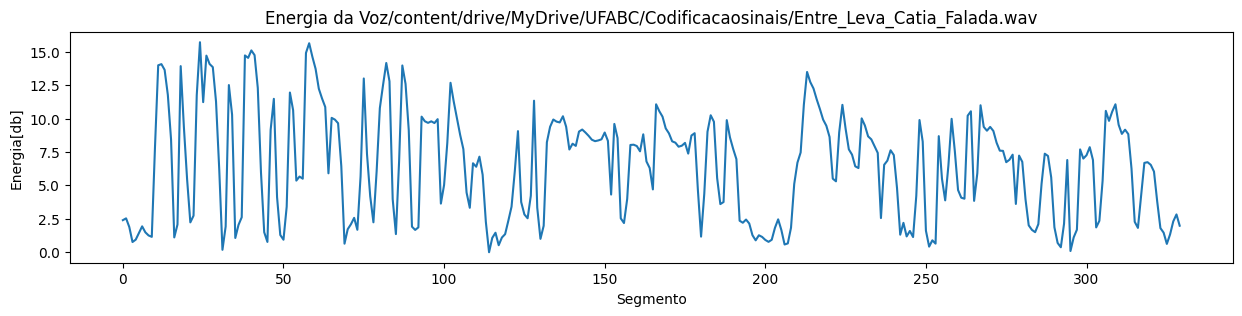

In [ ]:
Nover = int(Nj*0.5)
Nseg = int(len(v1)/Nj)
E = []
for l in range(1, Nseg):
    xjan = v1[(l-1)*Nj+Nover:l*Nj+Nover]*hm
    x2 = list(np.array(xjan**2))
    aux = sum(x2)/Nj
    E.append(aux)
E = 10*np.log10(E)
Emin = np.min(E)  # calcula nível de ruído de fundo
plt.figure
fig, ax = plt.subplots(figsize=(15, 3))
plt.plot(E - Emin)
plt.title('Energia da Voz' + audio1)
plt.ylabel('Energia[db]'); plt.xlabel('Segmento')

### 3.2 Agora leia os seus arquivos gravados e:
**Determine o Contorno de Energia para três arquivos (todos os integrantes devem fazer a análise do gravaram):**
1. *dígitos*
2. *voz falada*
3. *voz declamada (poema)*


**Dígitos Jonnathas**

In [ ]:
print(audioRAJ1)
v2 , sr2 = librosa.load(audioRAJ1)
print(type(v2), type(sr2))
print(v2.shape,sr2)
IPython.display.Audio(data=v2, rate=sr2)

/content/drive/MyDrive/UFABC/Codificacaosinais/RA11123915.wav
<class 'numpy.ndarray'> <class 'int'>
(121154,) 22050


Text(0.5, 1.0, 'RA Jonnathas')

<Figure size 640x480 with 0 Axes>

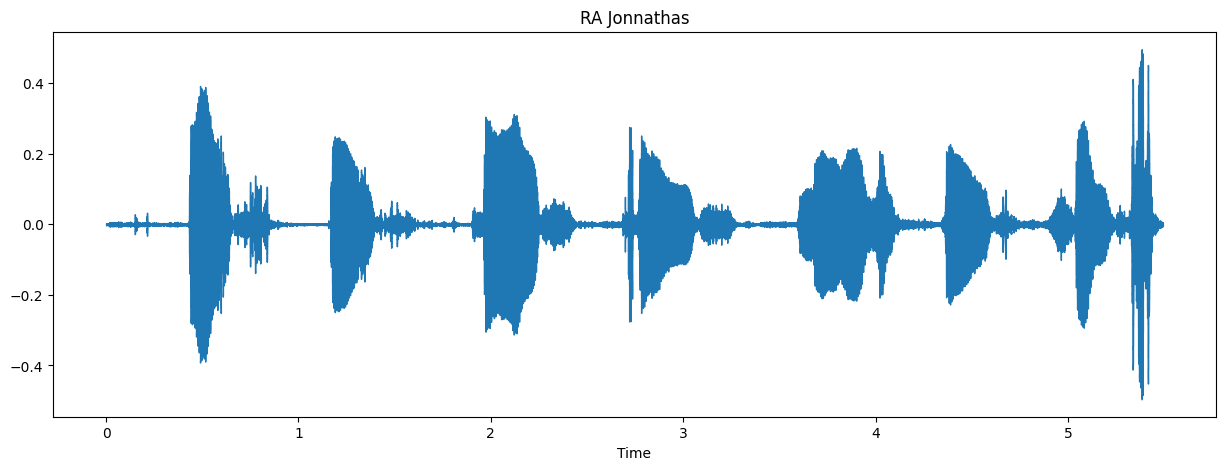

In [ ]:
plt.figure()
fig, ax = plt.subplots(figsize=(15, 5))
librosa.display.waveshow(v2, sr=sr2)
plt.title('RA Jonnathas')

In [ ]:
print('Frequência de Amostragem', sr2)

Frequência de Amostragem 22050


In [ ]:
fb = sr2
print(fb)

22050


In [ ]:
Ts = 0.04   # Tempo de duração do segmento em segundos
Nj = int(Ts*fb) # Número de pontos da Janela
print('Tamanho do Segmento', Nj)

Tamanho do Segmento 882


In [ ]:
Nseg = int(len(v2)/Nj)
Nover = int(Nj*0.5)
print('Número de Segmentos no Arquivo', Nseg, '. Pontos Soprepostos', Nover )

Número de Segmentos no Arquivo 137 . Pontos Soprepostos 441


Text(0.5, 1.0, 'Janela de Hamming')

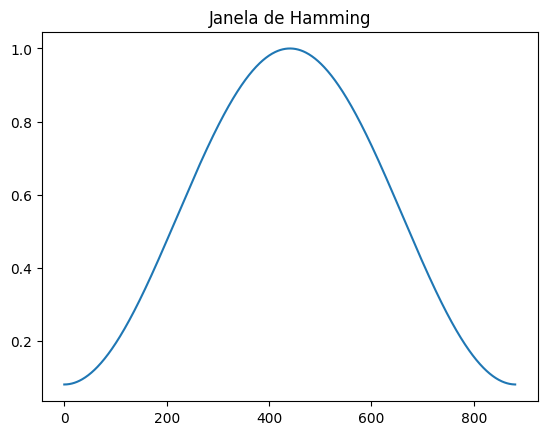

In [ ]:
hm = signal.get_window('hamming', Nj)
plt.plot(hm); plt.title('Janela de Hamming')

Text(0.5, 0, 'Segmento')

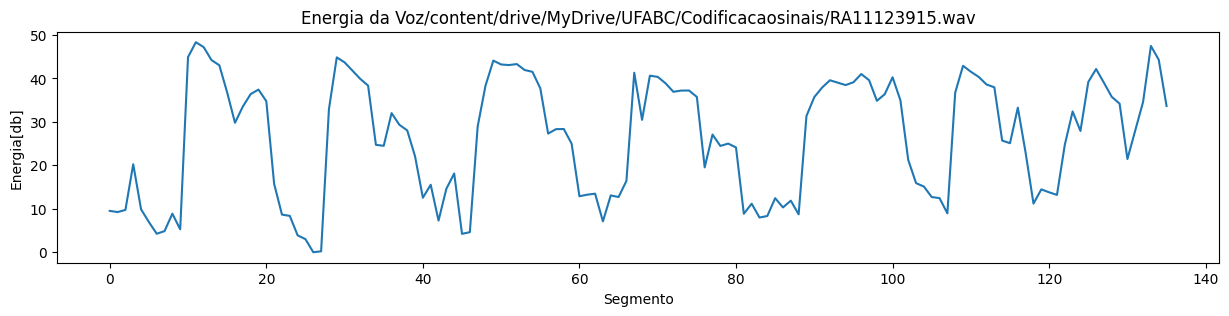

In [ ]:
Nover = int(Nj*0.5)
Nseg = int(len(v2)/Nj)
E = []
for l in range(1, Nseg):
    xjan = v2[(l-1)*Nj+Nover:l*Nj+Nover]*hm
    x2 = list(np.array(xjan**2))
    aux = sum(x2)/Nj
    E.append(aux)
E = 10*np.log10(E)
Emin = np.min(E)  # calcula nível de ruído de fundo
plt.figure
fig, ax = plt.subplots(figsize=(15, 3))
plt.plot(E - Emin)
plt.title('Energia da Voz' + audioRAJ1)
plt.ylabel('Energia[db]'); plt.xlabel('Segmento')

**Frase Jonnathas**

In [ ]:
print(audioFraseJ1)
v3 , sr3 = librosa.load(audioFraseJ1)
print(type(v3), type(sr3))
print(v3.shape,sr3)
IPython.display.Audio(data=v3, rate=sr3)

/content/drive/MyDrive/UFABC/Codificacaosinais/Frase1_Jonnathas.wav
<class 'numpy.ndarray'> <class 'int'>
(86015,) 22050


Text(0.5, 1.0, 'Frase Jonnathas')

<Figure size 640x480 with 0 Axes>

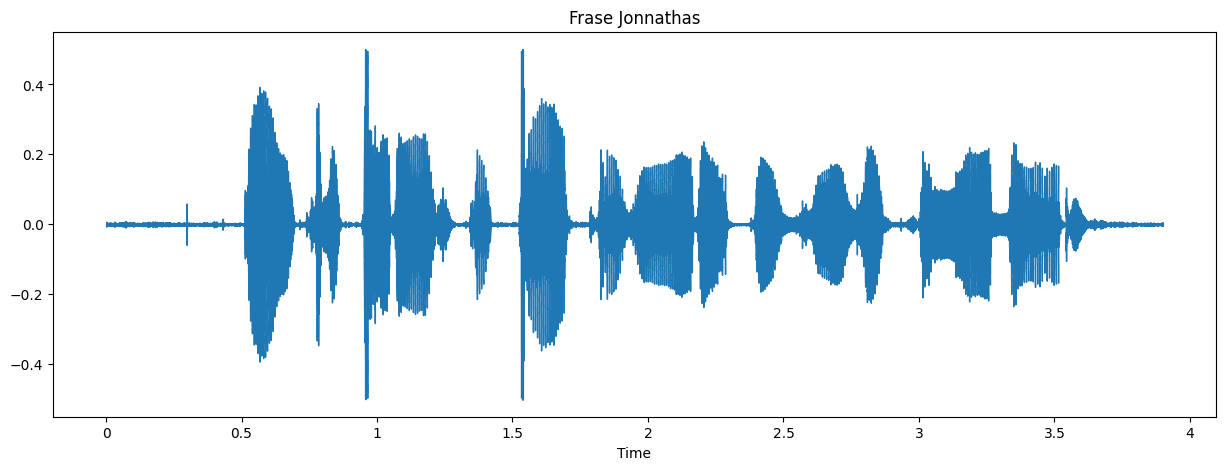

In [ ]:
plt.figure()
fig, ax = plt.subplots(figsize=(15, 5))
librosa.display.waveshow(v3, sr=sr3)
plt.title('Frase Jonnathas')

In [ ]:
print('Frequência de Amostragem', sr3)

Frequência de Amostragem 22050


In [ ]:
fc = sr3
print(fc)

22050


In [ ]:
Ts = 0.04   # Tempo de duração do segmento em segundos
Nj = int(Ts*fc) # Número de pontos da Janela
print('Tamanho do Segmento', Nj)

Tamanho do Segmento 882


In [ ]:
Nseg = int(len(v3)/Nj)
Nover = int(Nj*0.5)
print('Número de Segmentos no Arquivo', Nseg, '. Pontos Soprepostos', Nover )

Número de Segmentos no Arquivo 97 . Pontos Soprepostos 441


Text(0.5, 1.0, 'Janela de Hamming')

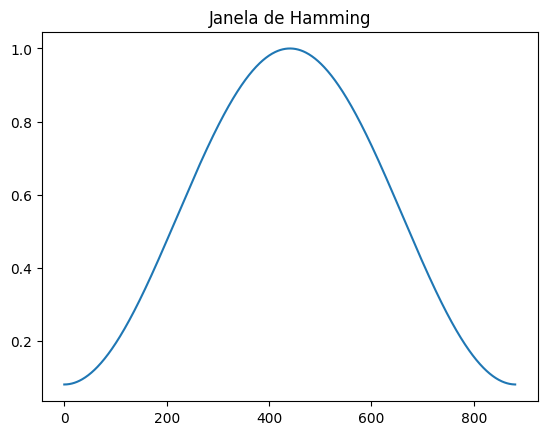

In [ ]:
hm = signal.get_window('hamming', Nj)
plt.plot(hm); plt.title('Janela de Hamming')

Text(0.5, 0, 'Segmento')

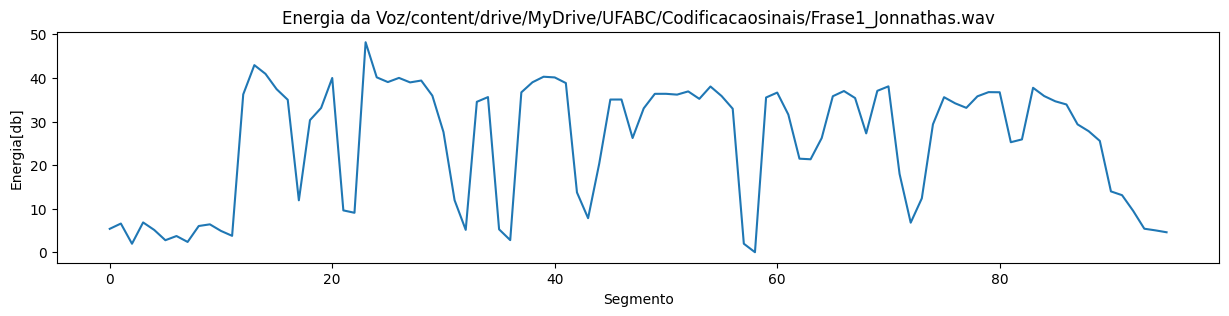

In [ ]:
Nover = int(Nj*0.5)
Nseg = int(len(v3)/Nj)
E = []
for l in range(1, Nseg):
    xjan = v3[(l-1)*Nj+Nover:l*Nj+Nover]*hm
    x2 = list(np.array(xjan**2))
    aux = sum(x2)/Nj
    E.append(aux)
E = 10*np.log10(E)
Emin = np.min(E)  # calcula nível de ruído de fundo
plt.figure
fig, ax = plt.subplots(figsize=(15, 3))
plt.plot(E - Emin)
plt.title('Energia da Voz' + audioFraseJ1)
plt.ylabel('Energia[db]'); plt.xlabel('Segmento')

**Trecho Jonnathas**

In [ ]:
print(audioTrechoJ1)
v4 , sr4 = librosa.load(audioTrechoJ1)
print(type(v4), type(sr4))
print(v4.shape,sr4)
IPython.display.Audio(data=v4, rate=sr4)

/content/drive/MyDrive/UFABC/Codificacaosinais/Trecho1_Jonnathas.wav
<class 'numpy.ndarray'> <class 'int'>
(174896,) 22050


Text(0.5, 1.0, 'Trecho Jonnathas')

<Figure size 640x480 with 0 Axes>

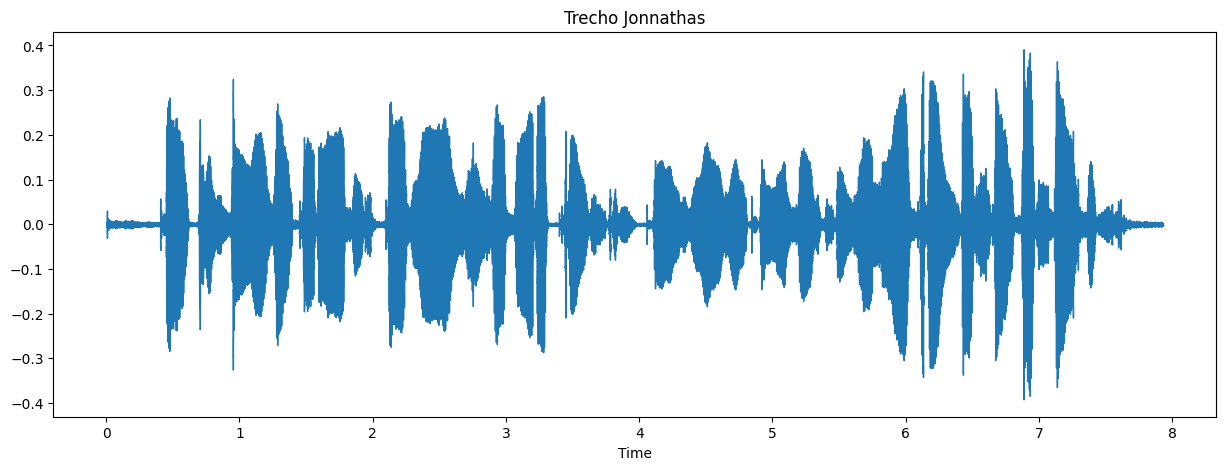

In [ ]:
plt.figure()
fig, ax = plt.subplots(figsize=(15, 5))
librosa.display.waveshow(v4, sr=sr4)
plt.title('Trecho Jonnathas')

In [ ]:
print('Frequência de Amostragem', sr4)

Frequência de Amostragem 22050


In [ ]:
fd = sr4
print(fd)

22050


In [ ]:
Ts = 0.04   # Tempo de duração do segmento em segundos
Nj = int(Ts*fd) # Número de pontos da Janela
print('Tamanho do Segmento', Nj)

Tamanho do Segmento 882


In [ ]:
Nseg = int(len(v4)/Nj)
Nover = int(Nj*0.5)
print('Número de Segmentos no Arquivo', Nseg, '. Pontos Soprepostos', Nover )

Número de Segmentos no Arquivo 198 . Pontos Soprepostos 441


Text(0.5, 1.0, 'Janela de Hamming')

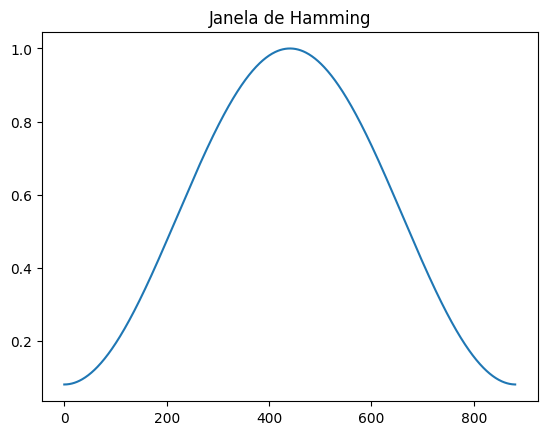

In [ ]:
hm = signal.get_window('hamming', Nj)
plt.plot(hm); plt.title('Janela de Hamming')

Text(0.5, 0, 'Segmento')

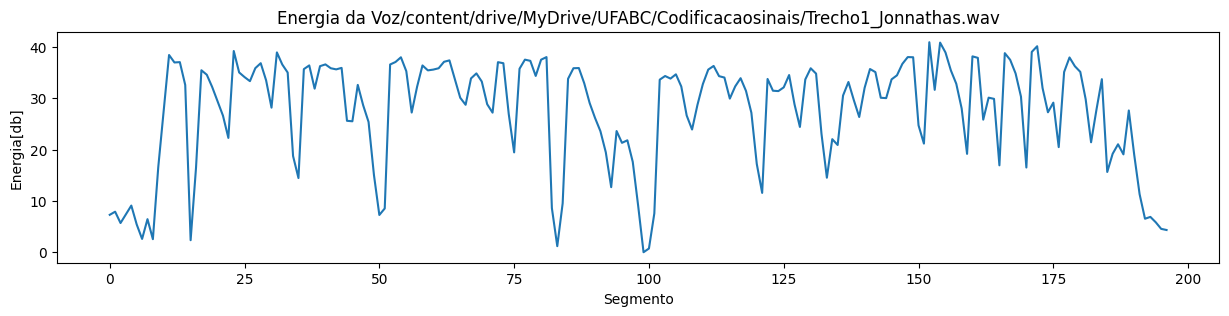

In [ ]:
Nover = int(Nj*0.5)
Nseg = int(len(v4)/Nj)
E = []
for l in range(1, Nseg):
    xjan = v4[(l-1)*Nj+Nover:l*Nj+Nover]*hm
    x2 = list(np.array(xjan**2))
    aux = sum(x2)/Nj
    E.append(aux)
E = 10*np.log10(E)
Emin = np.min(E)  # calcula nível de ruído de fundo
plt.figure
fig, ax = plt.subplots(figsize=(15, 3))
plt.plot(E - Emin)
plt.title('Energia da Voz' + audioTrechoJ1)
plt.ylabel('Energia[db]'); plt.xlabel('Segmento')

<h2> 4. Espectrogramas </h2>

### 4.1 Visualização do Espectrograma para Arquivo de Teste

Text(0.5, 1.0, 'Potência e Espectrograma Linear na Frequência/content/drive/MyDrive/UFABC/Codificacaosinais/Entre_Leva_Catia_Falada.wav')

<Figure size 1200x800 with 0 Axes>

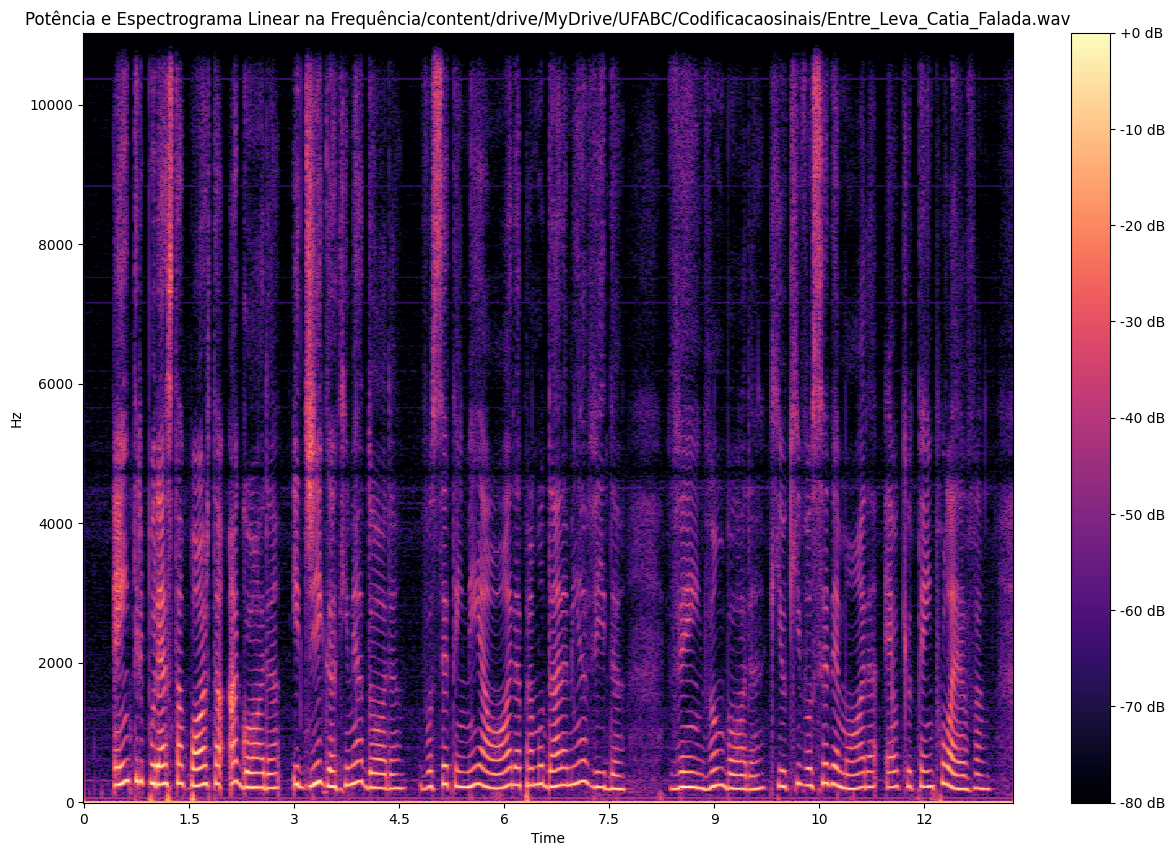

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 8))
D = librosa.amplitude_to_db(np.abs(librosa.stft(v1)), ref=np.max)
fig, ax = plt.subplots(figsize=(15, 10))
librosa.display.specshow(D, x_axis='time',y_axis='linear')
plt.colorbar(format='%+2.0f dB')
plt.title('Potência e Espectrograma Linear na Frequência'+ audio1)

### 4.2 Agora com os seus arquivos
**Faça os espectrogramas para os arquivos que vocês gravaram (todos novamente) e calculem o contorno de energia:**
<ul>
<li> Dígitos </li>
<li> Texto Lido </li>
<li> Poesia </li>
</ul>

**Dígitos Jonnathas**

Text(0.5, 1.0, 'Potência e Espectrograma Linear na Frequência/content/drive/MyDrive/UFABC/Codificacaosinais/RA11123915.wav')

<Figure size 1200x800 with 0 Axes>

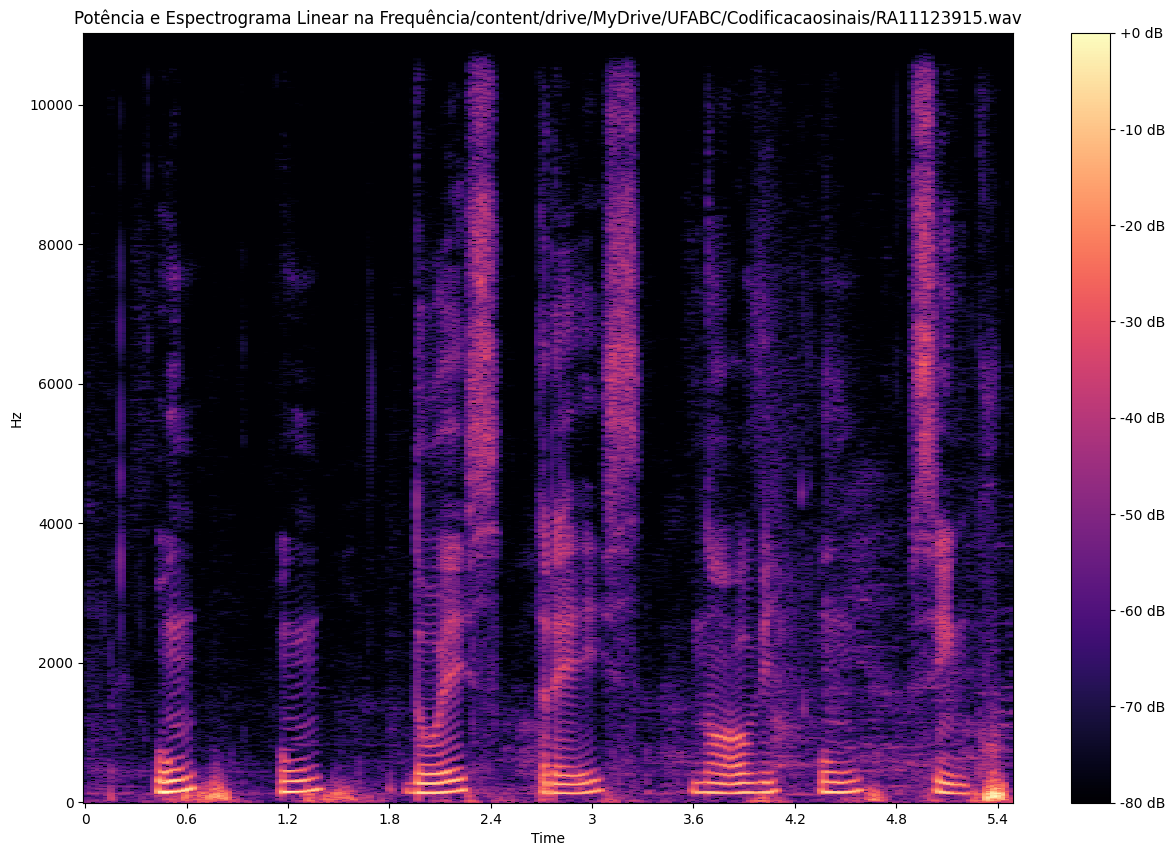

In [ ]:
plt.figure(figsize=(12, 8))
D = librosa.amplitude_to_db(np.abs(librosa.stft(v2)), ref=np.max)
fig, ax = plt.subplots(figsize=(15, 10))
librosa.display.specshow(D, x_axis='time',y_axis='linear')
plt.colorbar(format='%+2.0f dB')
plt.title('Potência e Espectrograma Linear na Frequência'+ audioRAJ1)

**Frase Jonnathas**

Text(0.5, 1.0, 'Potência e Espectrograma Linear na Frequência/content/drive/MyDrive/UFABC/Codificacaosinais/Frase1_Jonnathas.wav')

<Figure size 1200x800 with 0 Axes>

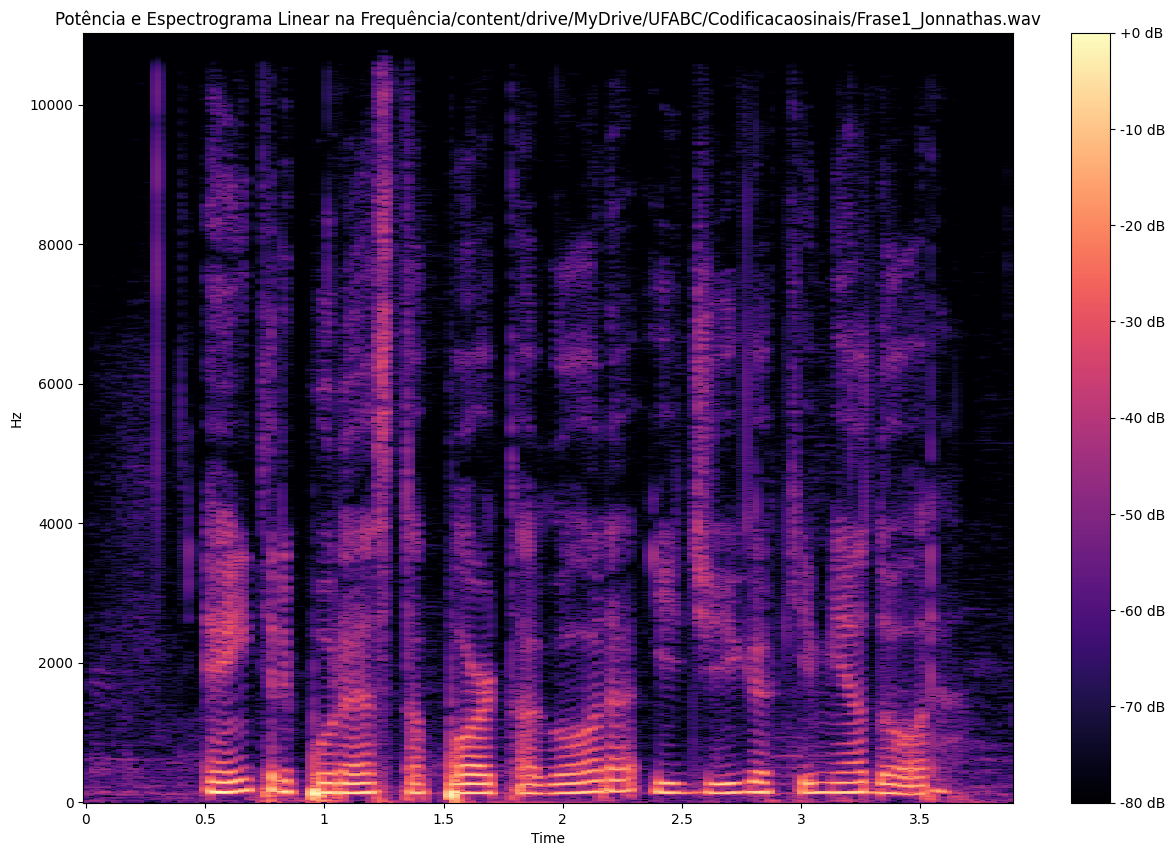

In [ ]:
plt.figure(figsize=(12, 8))
D = librosa.amplitude_to_db(np.abs(librosa.stft(v3)), ref=np.max)
fig, ax = plt.subplots(figsize=(15, 10))
librosa.display.specshow(D, x_axis='time',y_axis='linear')
plt.colorbar(format='%+2.0f dB')
plt.title('Potência e Espectrograma Linear na Frequência'+ audioFraseJ1)

**Trecho jonnathas**

Text(0.5, 1.0, 'Potência e Espectrograma Linear na Frequência/content/drive/MyDrive/UFABC/Codificacaosinais/Trecho1_Jonnathas.wav')

<Figure size 1200x800 with 0 Axes>

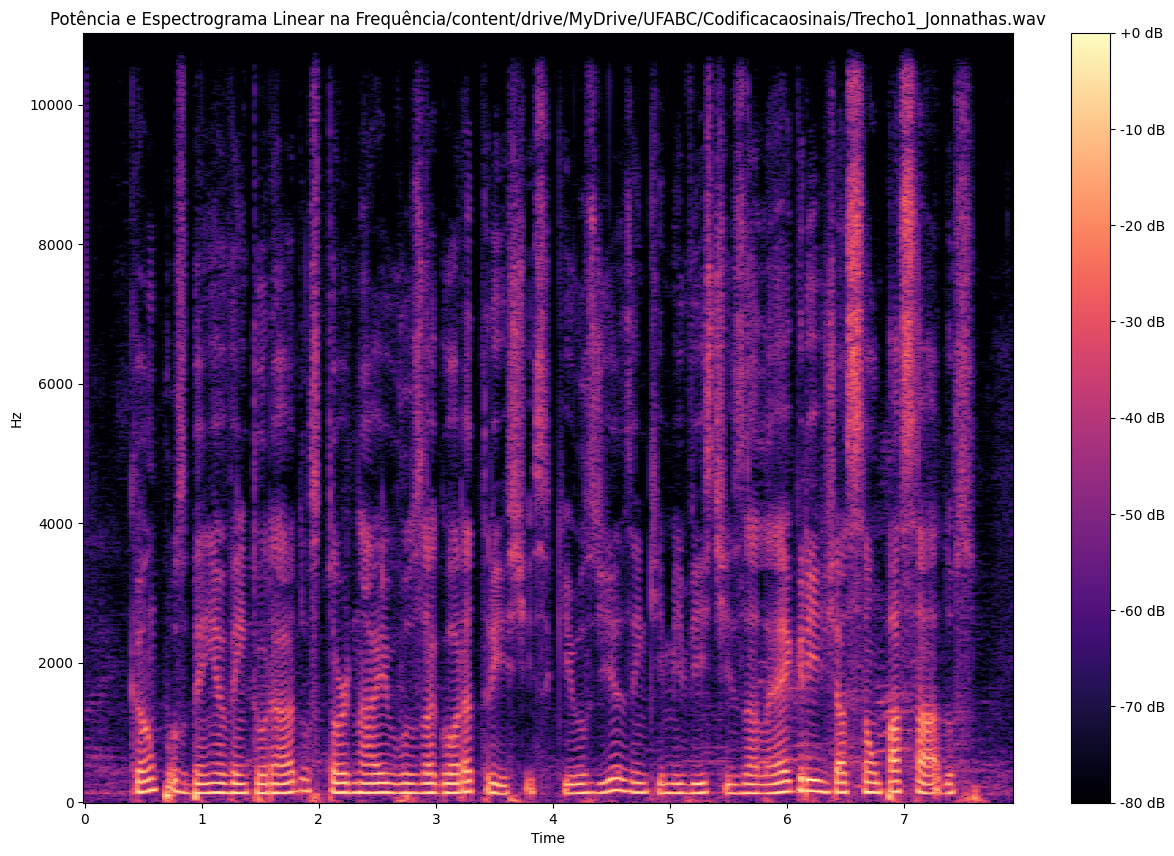

In [ ]:
plt.figure(figsize=(12, 8))
D = librosa.amplitude_to_db(np.abs(librosa.stft(v4)), ref=np.max)
fig, ax = plt.subplots(figsize=(15, 10))
librosa.display.specshow(D, x_axis='time',y_axis='linear')
plt.colorbar(format='%+2.0f dB')
plt.title('Potência e Espectrograma Linear na Frequência'+ audioTrechoJ1)

<h2> 5. Determinação do Pitch e da F0 </h2>

### 5.1 Pitch do Arquivo Teste1

In [ ]:
# Segmente um fonema que tenha Pitch, p.ex "En" de "Entre"
v1En = v1[4000:16000]
IPython.display.Audio(data=v1En, rate=sr1)


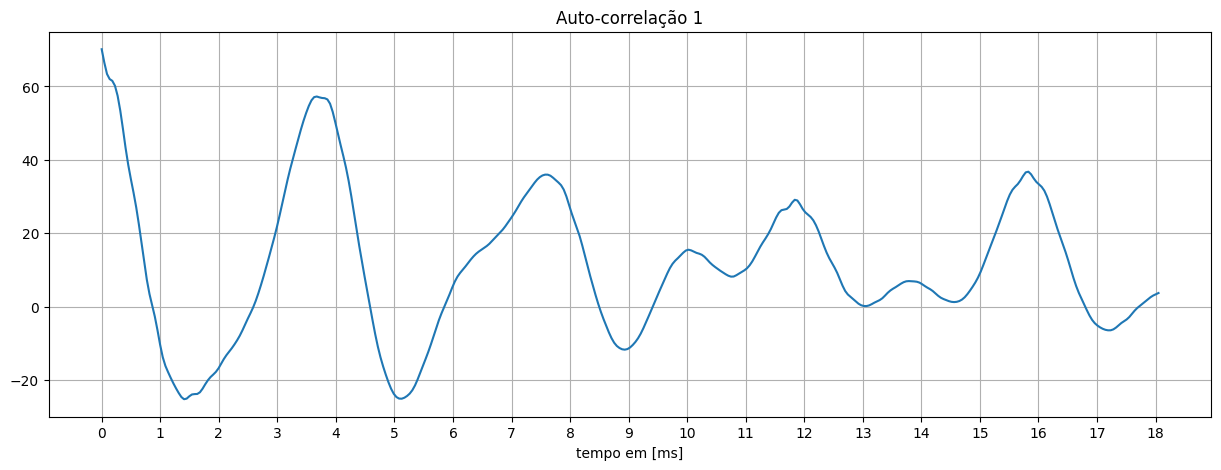

In [ ]:
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter, AutoMinorLocator)
acEn = librosa.autocorrelate(v1En, max_size= sr1/32)
fig, ax = plt.subplots(figsize=(15, 5))
ax.xaxis.set_major_locator(MultipleLocator(1))
y1 = acEn[1:400]
x1 = range(len(y1))
xx = [i*1000/sr1 for i in x1]
plt.grid(True)
ax.plot(xx,y1)

plt.title('Auto-correlação 1')
plt.xlabel('tempo em [ms]')
plt.show()

### O Período de Pitch ($T_{0}$) será o intervalo entre picos sucessivos.
### A Frequência Fundamental ($f_0$) será o inverso do periódo de Pitch

Determine o Período de Pitch e a Fundamental desta vogal.

## Agora com cada um dos seus arquivos:
**Determine o Pitch e a $f_0$ das vogais que desejarem (três vogais diferentes) dos seus arquivos, para as versões:**
1. Dígitos
2. Falada
3. Declamada

**Dígitos Jonnathas**

In [ ]:
# Segmente um fonema que tenha Pitch, p.ex "En" de "Entre"
v2Um = v2[4000:16000]
IPython.display.Audio(data=v2Um, rate=sr2)


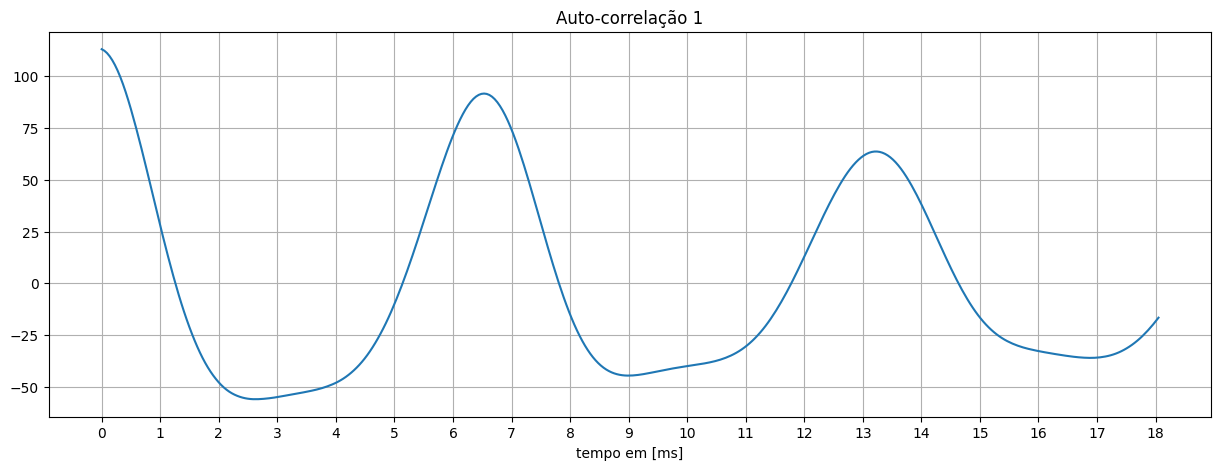

In [ ]:
acUm = librosa.autocorrelate(v2Um, max_size= sr2/32)
fig, ax = plt.subplots(figsize=(15, 5))
ax.xaxis.set_major_locator(MultipleLocator(1))
y1 = acUm[1:400]
x1 = range(len(y1))
xx = [i*1000/sr2 for i in x1]
plt.grid(True)
ax.plot(xx,y1)

plt.title('Auto-correlação 1')
plt.xlabel('tempo em [ms]')
plt.show()

# $T_{0}$ = 13.2-6.5 = 6.7 ms
# $f_0$ = 1/$T_{0}$ = 300.783 Hz



**Frase Jonnathas**

In [ ]:
# Segmente um fonema que tenha Pitch, p.ex "En" de "Entre"
V3En = v3[4000:16000]
IPython.display.Audio(data=V3En, rate=sr3)


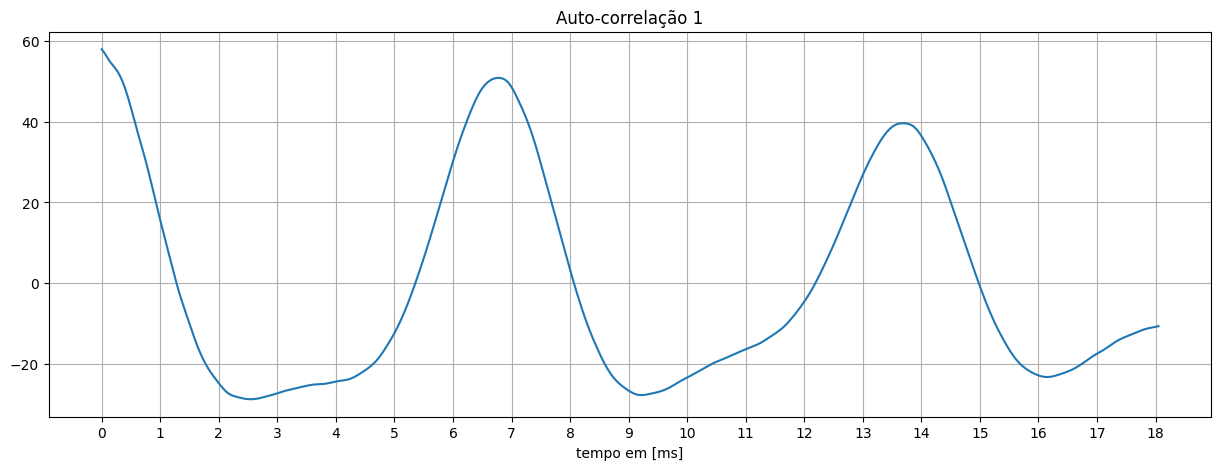

In [ ]:
acEn = librosa.autocorrelate(V3En, max_size= sr3/32)
fig, ax = plt.subplots(figsize=(15, 5))
ax.xaxis.set_major_locator(MultipleLocator(1))
y1 = acEn[1:400]
x1 = range(len(y1))
xx = [i*1000/sr3 for i in x1]
plt.grid(True)
ax.plot(xx,y1)

plt.title('Auto-correlação 1')
plt.xlabel('tempo em [ms]')
plt.show()

# $T_{0}$ = 13.75-6.75 = 7 ms
# $f_0$ = 1/$T_{0}$ = 343 Hz



**Trecho Jonnathas**

In [ ]:
# Segmente um fonema que tenha Pitch, p.ex "En" de "Entre"
v4Am = v4[4000:16000]
IPython.display.Audio(data=v4Am, rate=sr4)


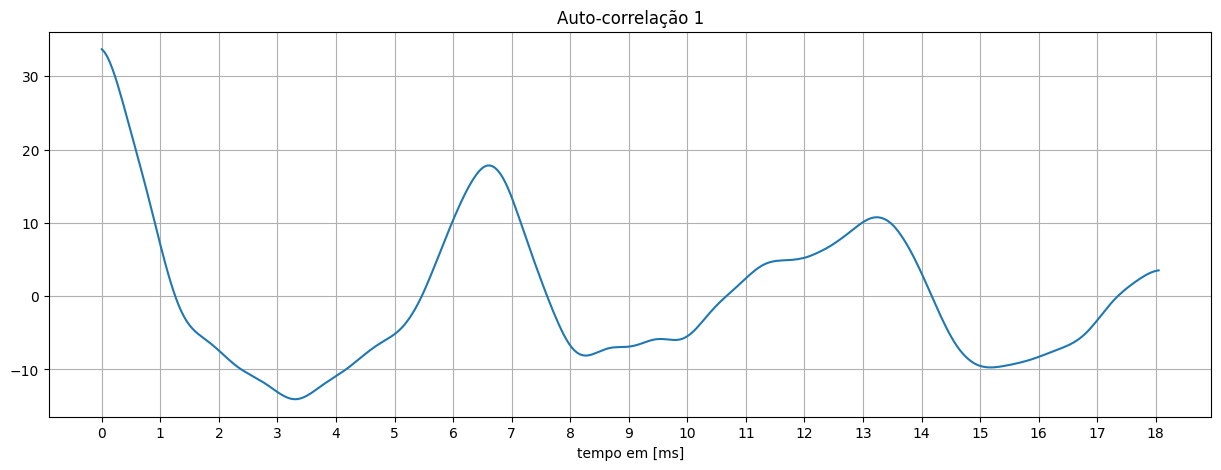

In [ ]:
acAm = librosa.autocorrelate(v4Am, max_size= sr4/32)
fig, ax = plt.subplots(figsize=(15, 5))
ax.xaxis.set_major_locator(MultipleLocator(1))
y1 = acAm[1:400]
x1 = range(len(y1))
xx = [i*1000/sr4 for i in x1]
plt.grid(True)
ax.plot(xx,y1)

plt.title('Auto-correlação 1')
plt.xlabel('tempo em [ms]')
plt.show()

# $T_{0}$ = 13.25-6.5 = 6.75 ms
# $f_0$ = 1/$T_{0}$ = 307.546875 Hz



## 5.3 Determinação das Formantes

#### 5.3.a Formantes do trecho de teste

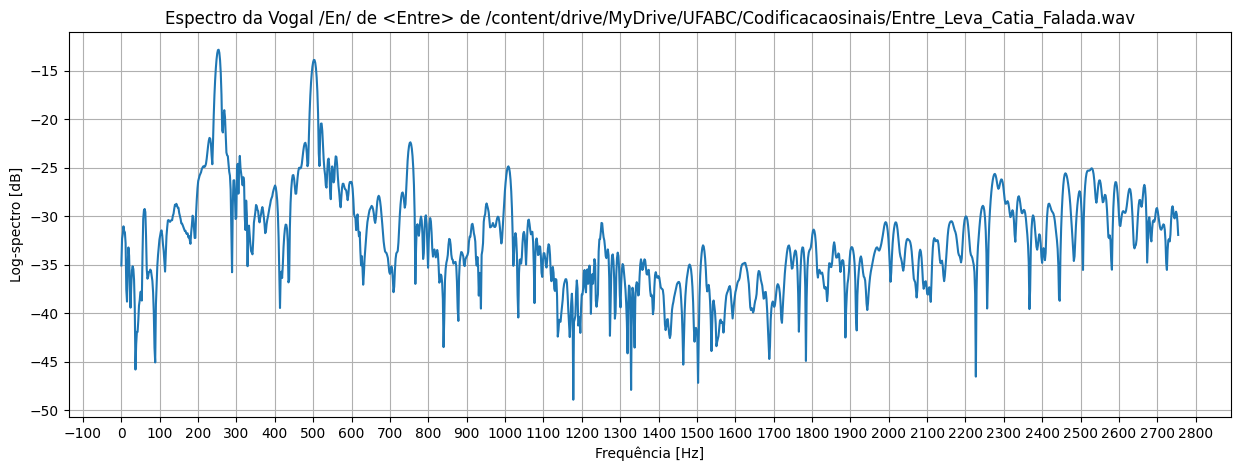

In [ ]:
# AUDIO DE "En" em v1En
f, Pxx_spec = signal.periodogram(v1En, fa, 'flattop', scaling='spectrum')
lf = len(f)
fig, AX = plt.subplots(figsize=(15, 5))
AX.xaxis.set_major_locator(MultipleLocator(100))
AX.plot(f[:int(lf/4)], 10*np.log10(np.sqrt(Pxx_spec[:int(lf/4)])))
plt.xlabel('Frequência [Hz]')
plt.ylabel('Log-spectro [dB]')
plt.title('Espectro da Vogal /En/ de <Entre> de '+audio1)
plt.grid(True)
plt.show()


#### 5.3.b Os quatro primeros picos no espectro são as formantes $f_1$ a $f_4$
### 5.4 Agora com seus arquivos
Determine as formantes das vogais dos arquivos que vocês calcularam os espectrogramas

**Dígitos Jonnathas**

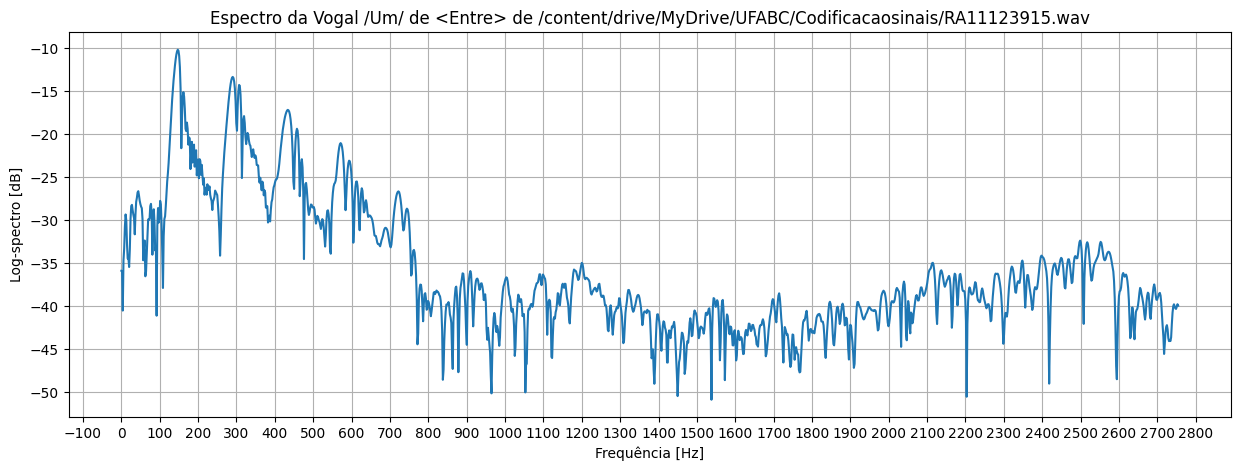

In [ ]:
# AUDIO DE "Um" em v2Um
f, Pxx_spec = signal.periodogram(v2Um, fb, 'flattop', scaling='spectrum')
lf = len(f)
fig, AX = plt.subplots(figsize=(15, 5))
AX.xaxis.set_major_locator(MultipleLocator(100))
AX.plot(f[:int(lf/4)], 10*np.log10(np.sqrt(Pxx_spec[:int(lf/4)])))
plt.xlabel('Frequência [Hz]')
plt.ylabel('Log-spectro [dB]')
plt.title('Espectro da Vogal /Um/ de <Um> de '+audioRAJ1)
plt.grid(True)
plt.show()


**Frase Jonnathas**

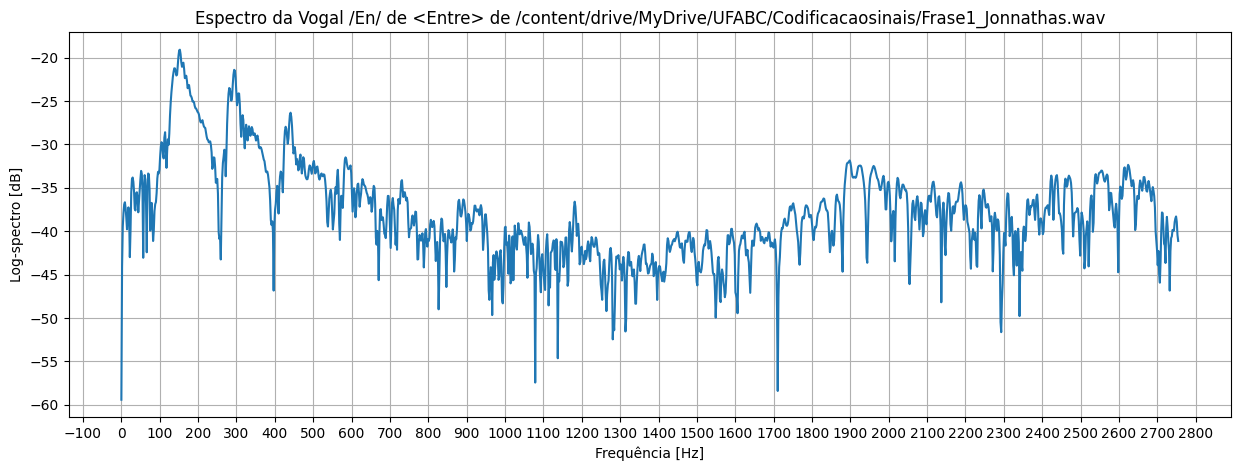

In [ ]:
# AUDIO DE "En" em v3En
f, Pxx_spec = signal.periodogram(V3En, fc, 'flattop', scaling='spectrum')
lf = len(f)
fig, AX = plt.subplots(figsize=(15, 5))
AX.xaxis.set_major_locator(MultipleLocator(100))
AX.plot(f[:int(lf/4)], 10*np.log10(np.sqrt(Pxx_spec[:int(lf/4)])))
plt.xlabel('Frequência [Hz]')
plt.ylabel('Log-spectro [dB]')
plt.title('Espectro da Vogal /En/ de <Entre> de '+audioFraseJ1)
plt.grid(True)
plt.show()


**Trecho Jonnathas**

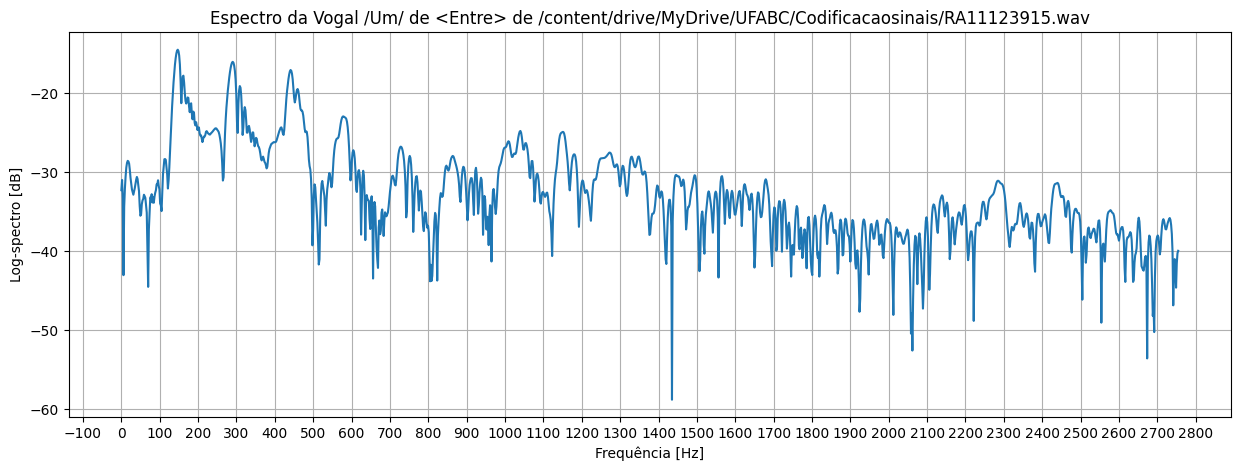

In [ ]:
# AUDIO DE "Am" em v4Am
f, Pxx_spec = signal.periodogram(v4Am, fd, 'flattop', scaling='spectrum')
lf = len(f)
fig, AX = plt.subplots(figsize=(15, 5))
AX.xaxis.set_major_locator(MultipleLocator(100))
AX.plot(f[:int(lf/4)], 10*np.log10(np.sqrt(Pxx_spec[:int(lf/4)])))
plt.xlabel('Frequência [Hz]')
plt.ylabel('Log-spectro [dB]')
plt.title('Espectro da Vogal /Um/ de <Entre> de '+audioRAJ1)
plt.grid(True)
plt.show()


## 6. Determinação de Consoantes e Plosivos

Usando alguns de seus arquivos, no espectrograma, determine algumas consoantes surdas (p.ex. /s/ e /f/), surdas plosivas (p.ex. /p/, /t/ ou /k/) e sonoras (p.ex. (/b/, /v/, /g/, /m/, /nh/ e /lh/). Destaque circundando-as no espectrograma.

**Digitos Jonnathas**

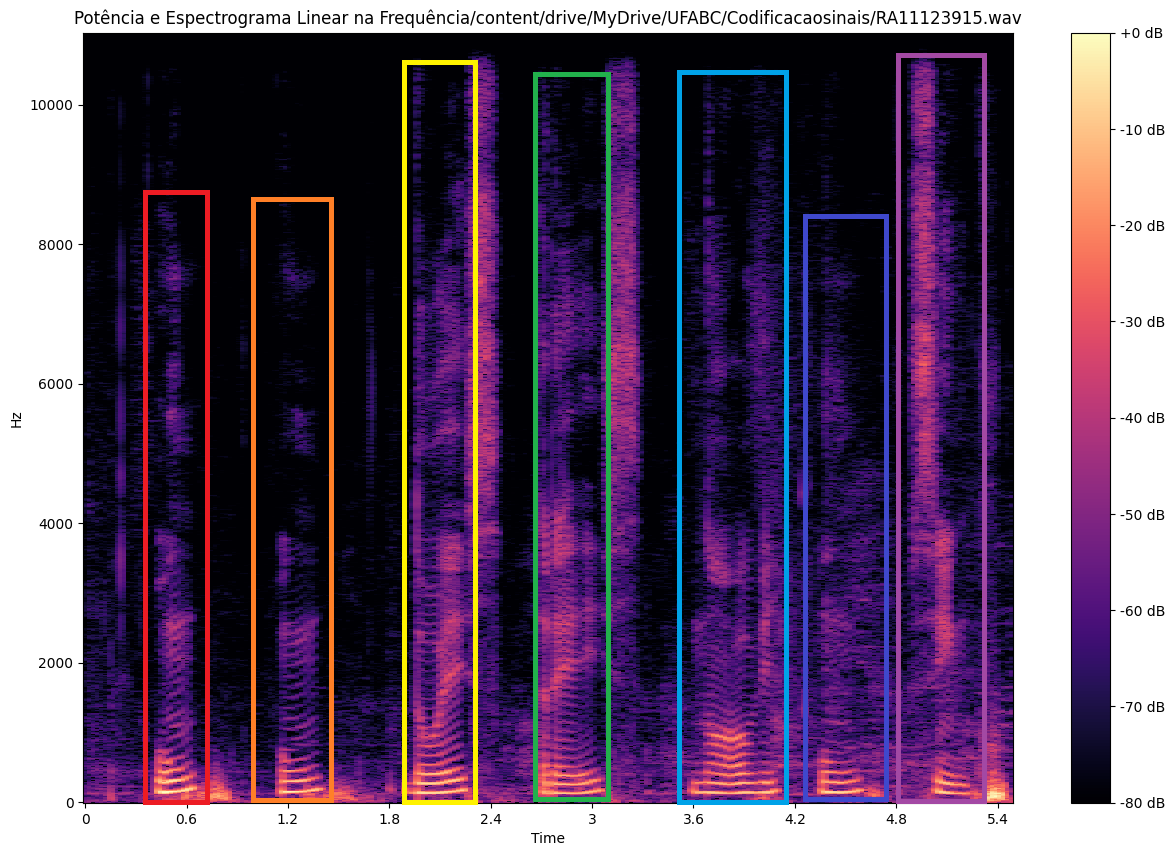

*   <font color='red'> **"um" (/m/)** </font>
*   <font color='orange'>**"um" (/m/)** </font>
*   <font color='yellow'>**"dois" (/s/)**</font>
*   <font color='green'>**"três" (/t//s/)**</font>
*   <font color='cyan'>**"nove" (/v/)**</font>
*   <font color='blue'> **"um" (/m/)** </font>
*   <font color='purple'> **"cinco"** </font>










# 7. RELATÓRIO, parte do COLAB

* A áudio descrição pode ser mais simplificada, pois neste Lab são muitos os arquivos de áudio.  
* Na página do Laboratório (LEMBREM-SE que os notebooks são ANEXOS, e não páginas html), incluir os arquivos de voz de cada um dos integrantes.
*   Fazer uma tabela com todos os valores de pitch e $f_0$ de todos os integrantes, de acordo com o item 5.2., e comparem-nas.
* Escolher um conjunto de formantes ($f_1$ a $f_4$) de cada integrante, para a mesma vogal, e comparem-nas.
* Fazer uma seção de **Comentários e Conclusões** incluindo a análise dos espectrogramas das consoantes.





---

